In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('KaggleV2-May-2016.csv')

## Data Wrangling

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.dtypes.to_frame().T

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,float64,int64,object,object,object,int64,object,int64,int64,int64,int64,int64,int64,object


In [6]:
unique_columns=[ 'Gender','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']

In [7]:
for i in unique_columns:
    print(df[i].unique())

['F' 'M']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]
['No' 'Yes']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
def convert(x):
    if x>0:
        return 1
    else:
        return 0
df['Handcap']=df['Handcap'].apply(convert)    

In [10]:
df['Handcap'].value_counts()

0    108286
1      2241
Name: Handcap, dtype: int64

In [11]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%d %H:%M:%S')
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
df['dayswaited']=(df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date).dt.days

In [13]:
df['Hipertension']=df['Hipertension'].astype(bool)
df['Diabetes']=df['Diabetes'].astype(bool)
df['Alcoholism']=df['Alcoholism'].astype(bool)
df['Handcap']=df['Handcap'].astype(bool)
df['Scholarship']=df['Scholarship'].astype(bool)
df['SMS_received']=df['SMS_received'].astype(bool)

In [14]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                      bool
Hipertension                     bool
Diabetes                         bool
Alcoholism                       bool
Handcap                          bool
SMS_received                     bool
No-show                        object
dayswaited                      int64
dtype: object

## Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hipertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handcap         110527 non-null  bool               
 12  SMS_received    110527 non-null  bool               
 13  No-show       

Null Values doesn't exist

In [16]:
df.duplicated().sum()

0

 Will cheak AppointmentDay and Patient Id for duplicates

In [17]:
df[['PatientId','AppointmentDay']].duplicated().sum()

8719

8719 duplicates in the data 

will drop them

In [18]:
df.drop_duplicates(subset=['PatientId','AppointmentDay'],inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101808 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       101808 non-null  float64            
 1   AppointmentID   101808 non-null  int64              
 2   Gender          101808 non-null  object             
 3   ScheduledDay    101808 non-null  datetime64[ns, UTC]
 4   AppointmentDay  101808 non-null  datetime64[ns, UTC]
 5   Age             101808 non-null  int64              
 6   Neighbourhood   101808 non-null  object             
 7   Scholarship     101808 non-null  bool               
 8   Hipertension    101808 non-null  bool               
 9   Diabetes        101808 non-null  bool               
 10  Alcoholism      101808 non-null  bool               
 11  Handcap         101808 non-null  bool               
 12  SMS_received    101808 non-null  bool               
 13  No-show       

In [20]:
drop_columns=['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(columns=drop_columns,axis=1,inplace=True)

In [21]:
df.head(2)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,dayswaited
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,No,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,No,0


replace no_show no to 1,and yes to 0

In [22]:
df.rename(columns={'No-show':'showed'},inplace=True)
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'showed',
       'dayswaited'],
      dtype='object')

In [23]:
df.showed=df.showed.replace('Yes',0)
df.showed=df.showed.replace('No',1)

In [24]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,1,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,1,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,1,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,1,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,1,0


In [25]:
df.Age.value_counts()

 0      3352
 1      2161
 52     1569
 53     1537
 2      1533
 56     1522
 50     1496
 49     1491
 57     1471
 54     1457
 51     1450
 38     1441
 59     1438
 19     1437
 36     1427
 39     1420
 3      1416
 34     1415
 5      1405
 6      1403
 33     1394
 30     1392
 58     1390
 37     1381
 17     1374
 32     1366
 21     1353
 18     1351
 20     1333
 8      1328
 55     1326
 28     1323
 60     1322
 31     1315
 44     1309
 47     1300
 16     1297
 7      1297
 46     1294
 29     1289
 45     1283
 48     1271
 22     1267
 61     1264
 27     1263
 40     1262
 23     1244
 9      1242
 62     1239
 41     1237
 35     1236
 25     1234
 64     1226
 4      1220
 43     1216
 63     1212
 26     1184
 42     1166
 10     1164
 24     1153
 66     1108
 15     1103
 11     1101
 65     1029
 13     1012
 12     1001
 14     1000
 68      951
 67      912
 69      769
 70      688
 73      679
 71      654
 72      579
 74      571
 76      526
 75      512

In [26]:
nul=df.query('Age == -1').index
df.drop(nul,inplace=True)

In [27]:
df.query('Age == -1')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited


In [28]:
df.describe()

,Age,showed,dayswaited
count,101807.000000,101807.000000,101807.000000
mean,37.059289,0.799385,10.284813
std,23.213906,0.400462,15.305771
min,0.000000,0.000000,-1.000000
25%,18.000000,1.000000,0.000000
50%,37.000000,1.000000,4.000000
75%,56.000000,1.000000,15.000000
max,115.000000,1.000000,179.000000


note : ther is a nigitve value in dayswaited



In [31]:
nal2=df.query('dayswaited <0')
df.drop(nal2.index,inplace=True)

In [32]:
df.describe()

,Age,showed,dayswaited
count,101803.000000,101803.000000,101803.000000
mean,37.059900,0.799417,10.285257
std,23.214054,0.400439,15.305908
min,0.000000,0.000000,0.000000
25%,18.000000,1.000000,0.000000
50%,37.000000,1.000000,4.000000
75%,56.000000,1.000000,15.000000
max,115.000000,1.000000,179.000000


58014     100
63912     100
68127     100
76284     100
79270     100
90372     100
92084     100
97666     100
108506    100
Name: Age, dtype: int64

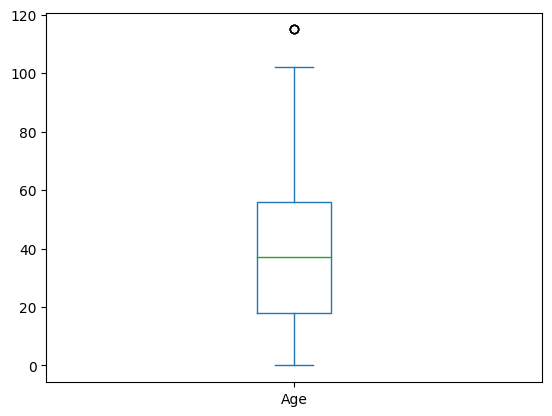

In [33]:
df.Age.plot(kind='box')

df.loc[df['Age']>100,'Age']=100
df.loc[df['Age']==100,'Age']

<Axes: >

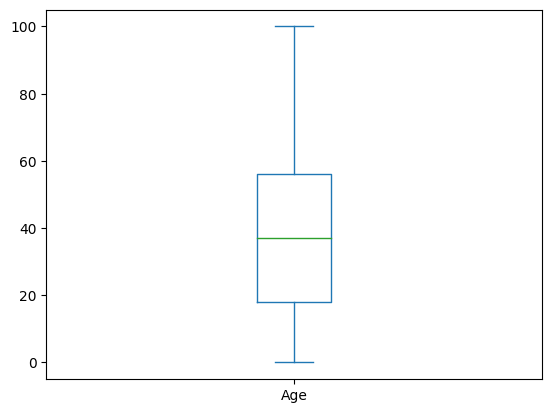

In [34]:
df.Age.plot(kind='box')

## Exploratory Data Analysis

Question 1 (Is there  a relationship betwwen the type of dieases has and showed,and which type of dises has a greater impact?)

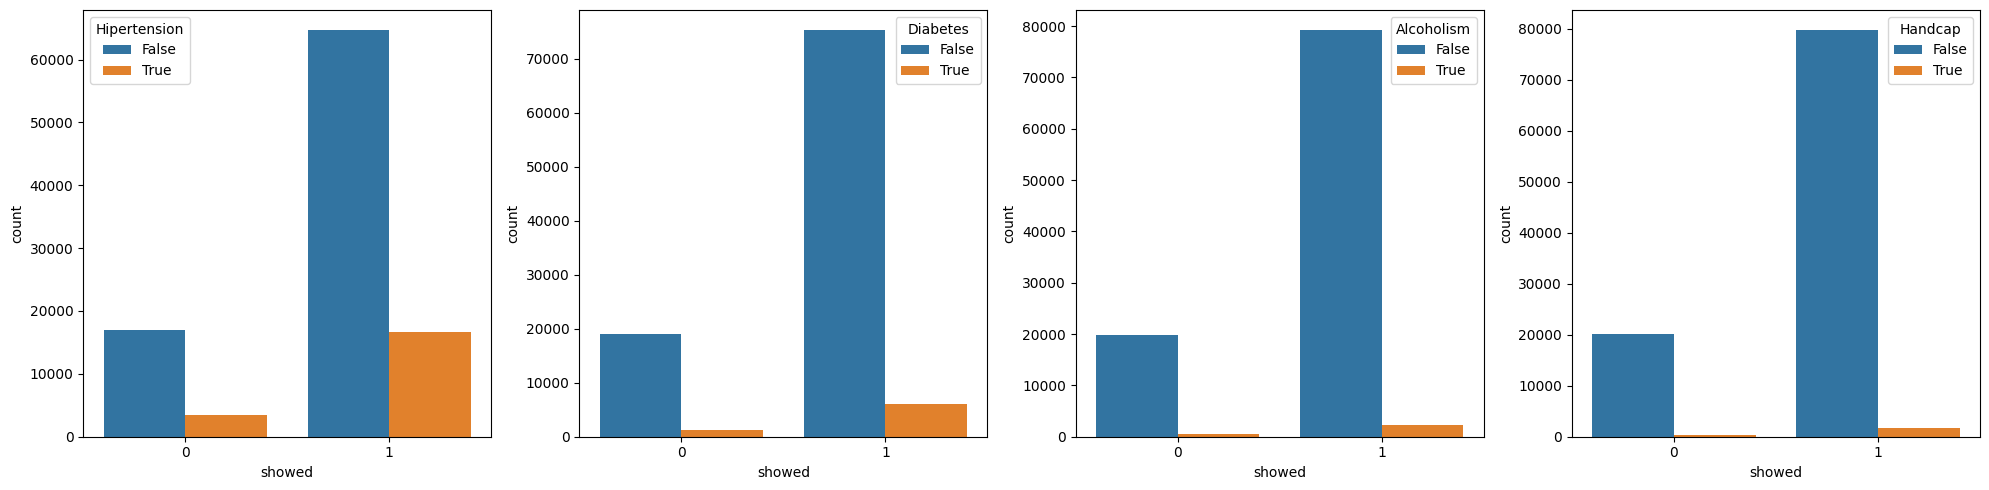

In [35]:
fig,ax=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
sns.countplot(x='showed' ,data=df,ax=ax[0],hue='Hipertension')
sns.countplot(x='showed' ,data=df,ax=ax[1],hue='Diabetes')
sns.countplot(x='showed' ,data=df,ax=ax[2],hue='Alcoholism')
sns.countplot(x='showed' ,data=df,ax=ax[3],hue='Handcap')
plt.tight_layout()

it is seem that Hipertension is higher then other disease

In [37]:
x=df.groupby('showed')['Hipertension'].value_counts()
h=(x[1][True]/df['Hipertension'].value_counts()[1])*100
h

82.90073310877749

82.9% of the people who had Hipertension attended 

In [38]:
y=df.groupby('showed')['Diabetes'].value_counts()
d=(y[1][True]/df['Diabetes'].value_counts()[1])*100
d

82.26854358419058

82.2% of the people who had Diabetes attended 

In [39]:
z=df.groupby('showed')['Alcoholism'].value_counts()
a=(z[1][True]/df['Alcoholism'].value_counts()[1])*100
a

78.4850640113798

78.4% of the people who had Alcoholism attended 

Text(0.5, 0, 'type of disease')

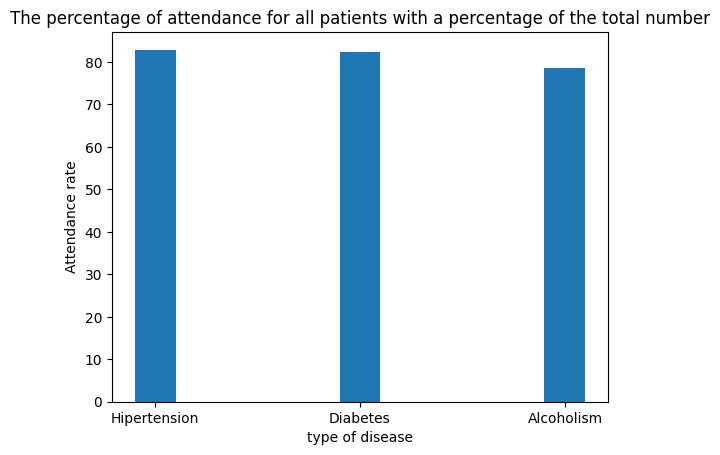

In [40]:
subset=[h,d,a]
X_axis = np.arange(len(subset))
lable=['Hipertension','Diabetes','Alcoholism']
plt.bar(X_axis,subset,.2)
plt.xticks(X_axis,lable)
plt.ylabel('Attendance rate')
plt.title('The percentage of attendance for all patients with a percentage of the total number')
plt.xlabel('type of disease')

Question 2 (Is there a relationship between attending the appointment and waiting days?)

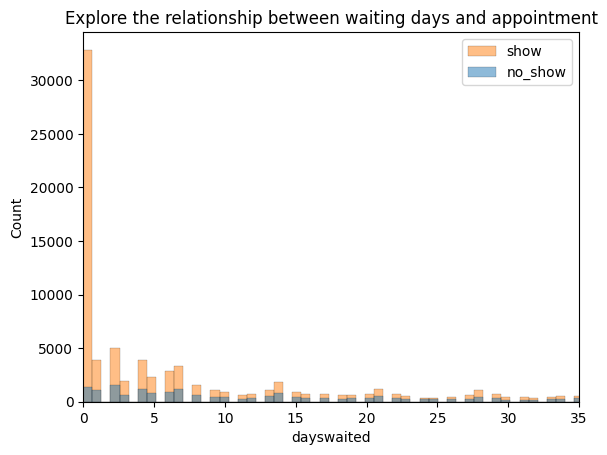

In [41]:
sns.histplot(data=df,x='dayswaited',hue='showed')
plt.xlim([0,35])
plt.title('Explore the relationship between waiting days and appointment')
plt.legend(['show','no_show'])

In [42]:
df.loc[df['dayswaited']<20].groupby('showed')['dayswaited'].value_counts()[1].sum()

67645

In [43]:
df.loc[df['dayswaited']>20].groupby('showed')['dayswaited'].value_counts()[1].sum()

13008

It seems that the fewer waiting days, the higher the attendance rate

Question 3 (Is there a relationship between attending the appointment and Gender?)

<Axes: ylabel='Gender'>

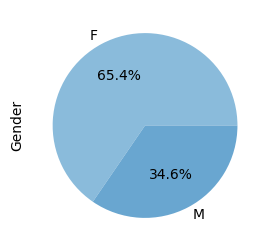

In [44]:
df.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%',colors=sns.color_palette('Blues_d'),figsize=(3,3))
#this is show that women take care of herself more than men or the most appointment is f

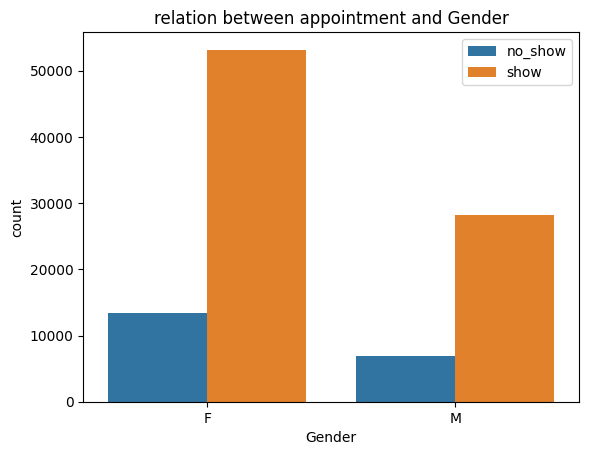

In [45]:
sns.countplot(data=df,x='Gender',hue='showed')
plt.title('relation between appointment and Gender')
plt.legend(['no_show','show'])

In [46]:
df.groupby('showed')['Gender'].value_counts()

showed  Gender
0       F         13452
        M          6968
1       F         53167
        M         28216
Name: Gender, dtype: int64

In [47]:
f_=df.groupby('showed')['Gender'].value_counts()[1]['F']
f_show=f_/df.Gender.value_counts()['F']*100
f_show

79.8075624071211

In [48]:
m_=df.groupby('showed')['Gender'].value_counts()[1]['M']
m_show=m_/df.Gender.value_counts()['M']*100
m_show

80.19554342883129

The percentage of attendance at the appointment is similar

Question 4 (Is there a relationship between attending the appointment and Age ?)

(0.0, 100.0)

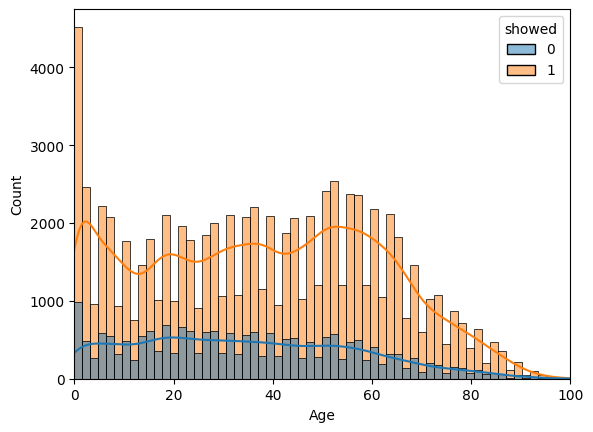

In [49]:
sns.histplot(data=df,x='Age',kde=True,hue='showed')
plt.xlim([0,100])

In [50]:
lable=['Childs','Adults','Seniors']
bins=[0,15,40,100]
df['Age_cust']=pd.cut(df['Age'],bins=bins,labels=['Childs','Adults','Seniors'])
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,showed,dayswaited,Age_cust
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,1,0,Seniors
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,1,0,Seniors
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,1,0,Seniors
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,1,0,Childs
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,1,0,Seniors


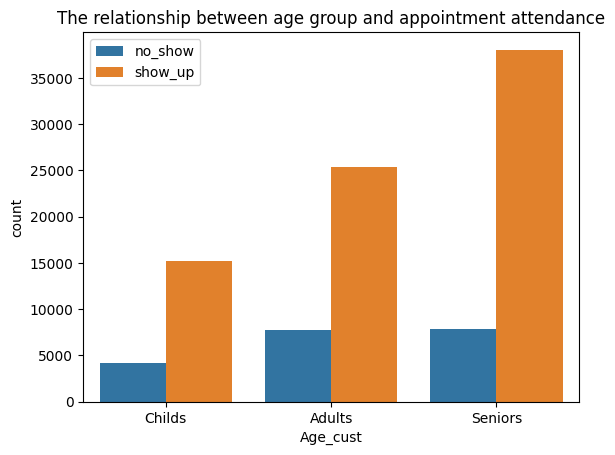

In [51]:
sns.countplot(x='Age_cust',data=df,hue='showed')
plt.title('The relationship between age group and appointment attendance')
plt.legend(['no_show','show_up'])

The seniors attend appointment higher then other people

## Conclusions

I have identified four factors to investigate their impact on attendance:

### 1. The type of disease:
It seems that the effect of the type of disease on the attendance rate is present, but it is small, as the ratio between the highest attendance and the lowest attendance does not exceed 4 percent.

lowest : Alcoholism : 78.4%
highest : Hipertension : 82.9%

### 2. The number of waiting days:

It seems to be the most influential factor in the attendance rate, as the attendance rate when there are no waiting days is much higher than the attendance rate when the number of days increases.

### 3. Gender:

There is no significant effect of this work on the urban attendance rate, as the female attendance rate was 0.3 percent less than the male attendance rate, which is a difference that has no effect.

### 4. Age :

This is considered the second most important influencing factor, as the data showed that the attendance rate of the elderly is much higher than that of adults and children.